In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#import seaborn as sns
from datetime import datetime

In [3]:
avisos = pd.read_csv('/home/luupesado/7506_Datos/2018/datos_navent_fiuba/fiuba_6_avisos_detalle.csv')

In [6]:
import unicodedata
def elimina_tildes(s):
   return ''.join((c for c in unicodedata.normalize('NFD', s) if unicodedata.category(c) != 'Mn'))
 
# que se puede usar asi:


## Cantidad de anuncios por area y por zona del area más solicitada

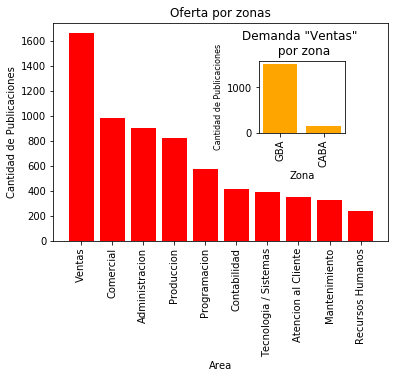

In [58]:
areas = avisos['nombre_area'].value_counts().head(10)#.plot(kind='bar', color = 'orange'))
fig, ax = plt.subplots()
#klist = avisos['nombre_area'].value_counts().head(10).index
#plt.axes(figsize=(20,10))

ax.bar(np.arange(10), areas, color = 'red')
ax.set_xticks(np.arange(10))#, ('a','b','c','d','e','f','g','h','i','j'))#ax.set_x
ax.set_xticklabels(klist,rotation='vertical')
ax.set_title('Oferta por zonas')
ax.set_xlabel('Area')
ax.set_ylabel('Cantidad de Publicaciones')

ventas = avisos[avisos['nombre_area']=='Ventas'] 
klist2 = ['GBA', 'CABA'] 
zonas = ventas['nombre_zona'].value_counts().head(2)
sub_axes = plt.axes([.6, .5, .20, .25])
sub_axes.bar(np.arange(len(zonas)), zonas, color = 'orange')
sub_axes.set_xticks(np.arange(2))#, ('a','b','c','d','e','f','g','h','i','j'))#ax.set_x
sub_axes.set_xticklabels(klist2,rotation='vertical')
sub_axes.set_title('Demanda "Ventas" \n por zona')
sub_axes.set_xlabel('Zona')
sub_axes.set_ylabel('Cantidad de Publicaciones', size = 8)


In [7]:
keys = areas.keys()
klist = []
for k in keys:
    klist.append(elimina_tildes(k.decode('utf-8')))
    
klist    

[u'Ventas',
 u'Comercial',
 u'Administracion',
 u'Produccion',
 u'Programacion',
 u'Contabilidad',
 u'Tecnologia / Sistemas',
 u'Atencion al Cliente',
 u'Mantenimiento',
 u'Recursos Humanos']

In [103]:
zonas

Gran Buenos Aires              12654
Capital Federal                  876
GBA Oeste                          2
Buenos Aires (fuera de GBA)        2
Name: nombre_zona, dtype: int64

In [23]:
postulaciones = pd.read_csv('/home/luupesado/7506_Datos/2018/datos_navent_fiuba/fiuba_4_postulaciones.csv')
postulaciones['fechapostulacion'] = pd.to_datetime(postulaciones['fechapostulacion'])
postulaciones['dia'] = postulaciones['fechapostulacion'].dt.weekday_name

In [24]:
postulaciones['mes'] = postulaciones['fechapostulacion'].dt.month

In [26]:
postulaciones['numero_dia'] = postulaciones['fechapostulacion'].dt.day

In [27]:
postulaciones.head()

,idaviso,idpostulante,fechapostulacion,dia,mes,numero_dia
0,1112257047,NM5M,2018-01-15 16:22:34,Monday,1,15
1,1111920714,NM5M,2018-02-06 09:04:50,Tuesday,2,6
2,1112346945,NM5M,2018-02-22 09:04:47,Thursday,2,22
3,1112345547,NM5M,2018-02-22 09:04:59,Thursday,2,22
4,1112237522,5awk,2018-01-25 18:55:03,Thursday,1,25


In [28]:
enero = postulaciones[postulaciones['mes']==1]

In [39]:
print enero['numero_dia'].value_counts().index
print febrero['numero_dia'].value_counts().index

Int64Index([24, 30, 29, 22, 23, 15, 31, 17, 16, 18, 25, 26, 19, 27, 28, 21,
            20],
           dtype='int64')
Int64Index([19, 20, 21, 26, 27, 28, 22, 15,  5,  6, 14, 23, 16,  1,  7,  2,  8,
             9, 25, 13, 24, 18, 17,  4, 12,  3, 10, 11],
           dtype='int64')


Tenemos información a partir del 15 de enero, por lo que para poder comparar, vamos a tomar los datos de febrero de cada quincena

In [37]:
febrero = postulaciones[postulaciones['mes']==2]
febrero_1quincena = febrero[febrero['numero_dia']<15]
febrero_2quincena = febrero[febrero['numero_dia']>=15]

In [47]:
febrero_2quincena.head()

,idaviso,idpostulante,fechapostulacion,dia,mes,numero_dia
2,1112346945,NM5M,2018-02-22 09:04:47,Thursday,2,22
3,1112345547,NM5M,2018-02-22 09:04:59,Thursday,2,22
10,1112303543,5awk,2018-02-18 23:49:34,Sunday,2,18
11,1112315393,5awk,2018-02-19 00:01:20,Monday,2,19
12,1112315188,5awk,2018-02-28 15:54:28,Wednesday,2,28


In [51]:
y = [postulacionesdia.Monday, postulacionesdia.Tuesday, postulacionesdia.Wednesday, postulacionesdia.Thursday, postulacionesdia.Friday,postulacionesdia.Saturday,postulacionesdia.Sunday]
x = ['Monday', 'Tuesday','Wednesday', 'Thursday',  'Friday', 'Saturday', 'Sunday']

In [40]:
enero = enero.groupby(['mes','dia'])['idaviso'].count()

In [49]:
febrero_1quincena = febrero_1quincena.groupby(['mes','dia'])['idaviso'].count()
febrero_2quincena = febrero_2quincena.groupby(['mes','dia'])['idaviso'].count()

In [41]:
enero

mes  dia      
1    Friday       141935
     Monday       283169
     Saturday      68344
     Sunday        70437
     Thursday     161108
     Tuesday      275708
     Wednesday    275497
Name: idaviso, dtype: int64

In [50]:
jan_y = [enero[1].Monday, enero[1].Tuesday, enero[1].Wednesday, enero[1].Thursday, enero[1].Friday,enero[1].Saturday,enero[1].Sunday]
feb1_y = [febrero_1quincena[2].Monday, febrero_1quincena[2].Tuesday, febrero_1quincena[2].Wednesday, febrero_1quincena[2].Thursday, febrero_1quincena[2].Friday,febrero_1quincena[2].Saturday,febrero_1quincena[2].Sunday]
feb2_y = [febrero_2quincena[2].Monday, febrero_2quincena[2].Tuesday, febrero_2quincena[2].Wednesday, febrero_2quincena[2].Thursday, febrero_2quincena[2].Friday,febrero_2quincena[2].Saturday,febrero_2quincena[2].Sunday]

In [68]:
jan_y, feb_y

([283169, 275708, 275497, 161108, 141935, 68344, 70437],
 [385141, 382720, 402339, 345055, 304763, 148987, 156420])

## Cantidad de publicaciones por día total y por quincenas

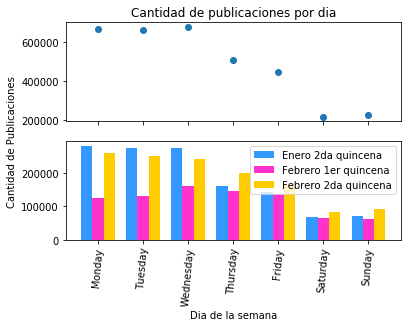

In [59]:
fig, (ax1, ax2)=plt.subplots(2,1,sharex = True)
ax1.scatter(np.arange(7), y)
ax1.set_xticks(np.arange(7))
ax1.set_xticklabels(x,rotation='horizontal')
ax2.set_xlabel('Dia de la semana')
ax2.set_ylabel('Cantidad de Publicaciones', x=1,y=1)

width = 0.25
jan = ax2.bar(np.arange(len(jan_y))-width, jan_y, width, color = '#3399ff')
feb1 = ax2.bar(np.arange(len(feb1_y)), feb1_y, width, color = '#ff33cc')
feb2 = ax2.bar(np.arange(len(feb2_y))+width, feb2_y, width, color = '#ffcc00')
ax2.set_xticks(np.arange(7))
ax2.set_xticklabels(x,rotation=85)

ax2.legend((jan[0], feb1[0], feb2[0]), ('Enero 2da quincena', 'Febrero 1er quincena', 'Febrero 2da quincena'))

ax1.set_title('Cantidad de publicaciones por dia')
#ax2.set_title('Cantidad de publicaciones por dia')
